In [1]:
using FundamentalsNumericalComputation

┌ Info: verify download of index files...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\MatrixDepot.jl:117
┌ Info: reading database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:24


┌ Info: adding metadata...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:68


┌ Info: adding svd data...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:70


┌ Info: writing database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\download.jl:75


┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\lGEHe\src\MatrixDepot.jl:119


# Chapter 6 Initial value problems for ODEs

## Chapter 6.1: Basics of IVPs


### Some definitions:
* *Ordinary Differential Equation (ODE)*  : an equation that relates a function $y(t)$ to its derivatives $y'(t)$, $y''(t)$, etc.
* *Order* of an ODE : the highest derivative that appears in the equation.  Since higher order ODEs can be converted to systems of first order ODEs, we will focus on first order ODEs.
* *Initial Value Problems (IVPs)* are ODEs with initial conditions

Initial value problem:
$$
\begin{align}
u'(t) &= f(t,u(t))\text{, } a \leq t \leq b \\
u(a) &= u_0
\end{align}
$$

If $u' = f(t,u) = g(t) + u h(t)$ then the equation is linear.

A *solution* to an IVP is a function $u(t)$ that satisfies the equation and the initial condition.

### Numerical solutions in Julia
Julia `DifferentialEquations.jl` package provides solvers for IVps.   Lets demonstrate with one of the exercises:

Exercise 6.1.7:  

Experimental evidence shows that a 300-mg oral dose of caffeine, such as might be found in a large mug of drip-brewed coffee, creates a concentration of about 8 $\mu{\rm g}$/mL in blood plasma. This boost is followed by first-order kinetics with a half-life of about 6 hours (although this rate can vary a great deal from person to person). We can model the caffeine concentration due to one drink taken over half an hour via
$$
      x'(t) = -kx + C(t),\quad x(0)=0,
$$

where $k=\log(2)/6$ and

$$
      C(t) =
      \begin{cases}
        16, & 0\le t \le 0.5, \\
        0, & t > 0.5.
      \end{cases}
$$

Use `solve` to make a plot of the caffeine concentration for 12 hours. Then change $k=\log(2)/8$ (half-life of 8 hours) and plot the solution again.


In [31]:
# step function
C(t) =  16.0*(t <= 0.5)
f(u, p, t) =  -p*u + C(t)    
u₀ = 0.0
tspan = (0.0, 12.0)

(0.0, 12.0)

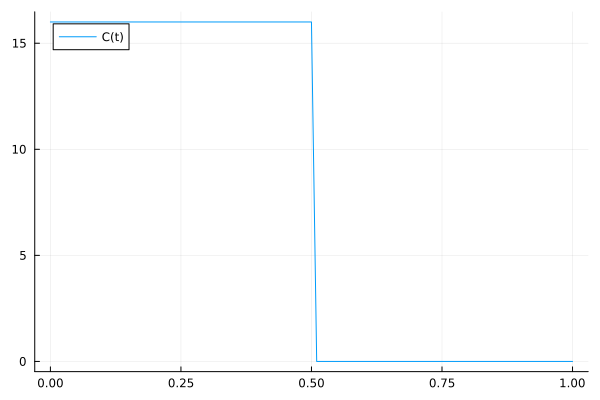

In [32]:
plot(0:0.01:1, C, label="C(t)", legend=:topleft)

In [36]:
ivp6 = ODEProblem(f, u₀, tspan, log(2)/6)
ivp8 = ODEProblem(f, u₀, tspan, log(2)/8)
sol6 = solve(ivp6, Tsit5());
sol8 = solve(ivp8, Tsit5());
plot((sol6, sol8), label="u(t)", legend=:topleft)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


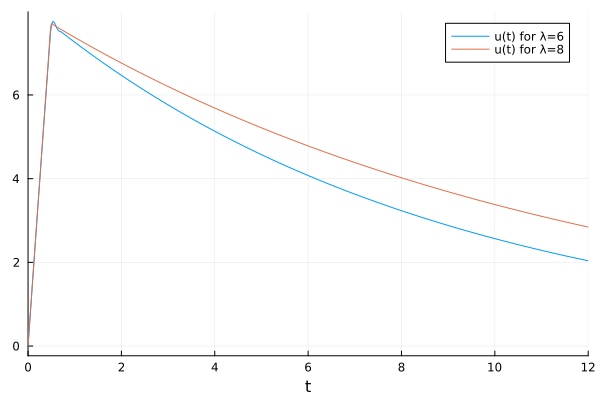

In [39]:
# Plot both solutions:
plot(sol6, label="u(t) for λ=6", legend=:topright)
plot!(sol8, label="u(t) for λ=8")

### Existence and uniqueness

Theorem: If  $\frac{\partial f}{\partial u}$ exists and $|\frac{\partial f}{\partial u}|$ is bounded by a constant $L$ for all $a \leq t \leq b$  then the IVP problem defined above has a unique solution.

#### Exercise 6.1.1 and 6.1.2
Determine whether these problems satisfy the conditions of the above theorem and if so determine the smallest value for L.  Then solve it using `solve` and plot the solution, with initial condition $u(0) = 1$.

c) $f(t,u) = -(1+t^2)u^2$,   $1 \leq t \leq 3$  

This IVP will decay to zero , the solution $u$ is bounded by $u_0$. The partial derivative is $-2(1+t^2)u$ which is bounded in absolute value by $2(1+3^2)u_0$.  So $L = $20 u_0$.


┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


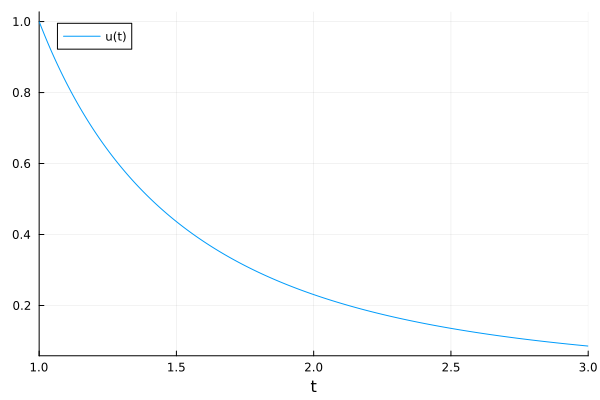

In [42]:
ivp_c = ODEProblem((u,p,t) -> -(1 + t^2)*u^2, 1.0, (1.0, 3.0))
sol_c = solve(ivp_c, Tsit5())
plot(sol_c, label="u(t)", legend=:topleft)

d) $f(t,u) = \sqrt{u}$,   $0 \leq t \leq 1$

The partial derivative is $\frac{1}{2\sqrt{u}}$ which is bounded in absolute value by $\frac{1}{2\sqrt{u(1)}}$.   So $L = \frac{1}{2\sqrt{u(1)}}$.

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\rjljr\.julia\packages\SciMLBase\QqtZA\src\retcodes.jl:355


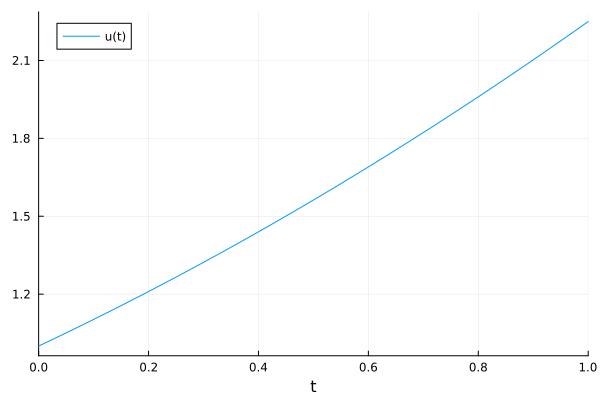

In [44]:
ivp_d = ODEProblem((u,p,t) -> sqrt(u), 1.0, (0.0, 1.0))
sol_d = solve(ivp_d, Tsit5())
plot(sol_d, label="u(t)", legend=:topleft)

### Conditioning of first order IVP

Theorem: If  $\frac{\partial f}{\partial u}$ exists and $|\frac{\partial f}{\partial u}|$ is bounded by a constant $L$ for all $a \leq t \leq b$  then the solution $u(t; u_0 + \delta)$ of $u' = f(t,u)$ with initial condition $u(a) = u_0 + \delta$ satisfies:
$$
\left\|u(t;u_0+\delta)-u(t;u_0)\right\|_\infty \le |\delta| e^{L(b-a)}
$$
for all sufficiently small $\delta$.

This upper bound may be a terrible overestimate for some cases (for example, text gives an example where solutions converge)

## 6.2 Euler's method